In [1]:
import requests
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://gql.tokopedia.com/graphql/SearchProductQueryV4'

In [3]:
payload = [{
    'operationName': "SearchProductQueryV4",
    'variables': {
        "params": "device=desktop&navsource=&ob=23&page={}&q={}&related=true&rows=60&safe_search=false&scheme=https&shipping=&source=search&srp_component_id=02.01.00.00&srp_page_id=&srp_page_title=&st=product&start={}&topads_bucket=true&unique_id=330142c9d1c168eaabef95522c06e1fa&user_addressId=44389028&user_cityId=167&user_districtId=2202&user_id=24265242&user_lat=-6.218126229670426&user_long=107.01841201633215&user_postCode=17123&user_warehouseId=12941747&variants=&warehouses=12941747%232h%2C0%2315m"
        },
    'query': "query SearchProductQueryV4($params: String!) {\n  ace_search_product_v4(params: $params) {\n    header {\n      totalData\n      totalDataText\n      processTime\n      responseCode\n      errorMessage\n      additionalParams\n      keywordProcess\n      componentId\n      __typename\n    }\n    data {\n      banner {\n        position\n        text\n        imageUrl\n        url\n        componentId\n        trackingOption\n        __typename\n      }\n      backendFilters\n      isQuerySafe\n      ticker {\n        text\n        query\n        typeId\n        componentId\n        trackingOption\n        __typename\n      }\n      redirection {\n        redirectUrl\n        departmentId\n        __typename\n      }\n      related {\n        position\n        trackingOption\n        relatedKeyword\n        otherRelated {\n          keyword\n          url\n          product {\n            id\n            name\n            price\n            imageUrl\n            rating\n            countReview\n            url\n            priceStr\n            wishlist\n            shop {\n              city\n              isOfficial\n              isPowerBadge\n              __typename\n            }\n            ads {\n              adsId: id\n              productClickUrl\n              productWishlistUrl\n              shopClickUrl\n              productViewUrl\n              __typename\n            }\n            badges {\n              title\n              imageUrl\n              show\n              __typename\n            }\n            ratingAverage\n            labelGroups {\n              position\n              type\n              title\n              url\n              __typename\n            }\n            componentId\n            __typename\n          }\n          componentId\n          __typename\n        }\n        __typename\n      }\n      suggestion {\n        currentKeyword\n        suggestion\n        suggestionCount\n        instead\n        insteadCount\n        query\n        text\n        componentId\n        trackingOption\n        __typename\n      }\n      products {\n        id\n        name\n        ads {\n          adsId: id\n          productClickUrl\n          productWishlistUrl\n          productViewUrl\n          __typename\n        }\n        badges {\n          title\n          imageUrl\n          show\n          __typename\n        }\n        category: departmentId\n        categoryBreadcrumb\n        categoryId\n        categoryName\n        countReview\n        customVideoURL\n        discountPercentage\n        gaKey\n        imageUrl\n        labelGroups {\n          position\n          title\n          type\n          url\n          __typename\n        }\n        originalPrice\n        price\n        priceRange\n        rating\n        ratingAverage\n        shop {\n          shopId: id\n          name\n          url\n          city\n          isOfficial\n          isPowerBadge\n          __typename\n        }\n        url\n        wishlist\n        sourceEngine: source_engine\n        __typename\n      }\n      violation {\n        headerText\n        descriptionText\n        imageURL\n        ctaURL\n        ctaApplink\n        buttonText\n        buttonType\n        __typename\n      }\n      __typename\n    }\n    __typename\n  }\n}\n"
}]

In [4]:
req = requests.post(url, json=payload).json()
rows = req[0]['data']['ace_search_product_v4']['data']['products']
print(len(rows))

60


In [5]:
print(req)

[{'data': {'ace_search_product_v4': {'header': {'totalData': 13864366, 'totalDataText': '13.6jt+', 'processTime': 0.377077459, 'responseCode': 6, 'errorMessage': '', 'additionalParams': 'rf=true&nuq=ac', 'keywordProcess': '7', 'componentId': '02.01.00.00', '__typename': 'AceSearchUnifyHeader'}, 'data': {'banner': {'position': 0, 'text': '', 'imageUrl': '', 'url': '', 'componentId': '', 'trackingOption': 0, '__typename': 'AceSearchUnifyBanner'}, 'backendFilters': '&ob=104', 'isQuerySafe': True, 'ticker': {'text': '', 'query': '', 'typeId': 0, 'componentId': '', 'trackingOption': 0, '__typename': 'AceSearchUnifyTicker'}, 'redirection': {'redirectUrl': '', 'departmentId': 0, '__typename': 'AceSearchUnifyRedirection'}, 'related': {'position': 0, 'trackingOption': 0, 'relatedKeyword': 'ac', 'otherRelated': [], '__typename': 'AceSearchUnifyRelated'}, 'suggestion': {'currentKeyword': '{}', 'suggestion': 'ac', 'suggestionCount': 13858396, 'instead': '', 'insteadCount': 0, 'query': '', 'text': 

In [6]:
for i in range(0, len(rows)):
    no = i
    nama_produk = rows[i]['name']
    harga = rows[i]['price']
    rating = rows[i]['ratingAverage']
    toko = rows[i]['shop']['name']
    lokasi = rows[i]['shop']['city']
    tjl = rows[i]['labelGroups']
    terjual = ''
    for i in tjl:
        if tjl[0]['position'] == 'costperunit':
            terjual = ''
        elif tjl[0]['title'] == 'PreOrder':
            terjual = ''
        elif tjl[0]['title'] == 'Grosir':
            terjual = ''
        elif tjl[0]['title'] == 'Produk Terbaru':
            terjual = ''
        elif tjl[0]['title'] =='Cashback':
            terjual = ''
        else:
            terjual = tjl[0]['title']
    #terjual = next((rows[i]['labelGroups'][0]['title'] for item in rows[i]['labelGroups'][0] if rows[i]['labelGroups'][0]['position'] == 'integrity'), None)
    print(no, nama_produk, harga, rating, toko, lokasi, terjual)

0 LG AC STANDART H05TN4 H05-TN4 [1/2 PK] GARANSI RESMI Rp2.499.401 4.9 sinar agung electronic Kab. Bekasi 
1 AC SAMSUNG 1/2 PK STANDARD AR05TGHQASINSE Rp2.899.000 4.9 Courts Elektronik Bekasi 
2 AC DAIKIN FTP 25 AV14 RV 1 PK + PASANG R32 STANDARD MALAYSIA LOW WATT Rp3.773.500 4.8 MJ GROSIR ELEKTRONIK Bekasi 
3 AC DAIKIN FTP 15 AV14 0.5 PK 1/2PK + PASANG R32 STANDARD MALAYSIA LOW Rp3.479.500 4.8 MJ GROSIR ELEKTRONIK Bekasi Terlaris
4 modul Ac universal Rp95.000 5.0 karya teknik ac Bekasi 
5 AC AQUA JAPAN AQA KR 05 AHP KR05AHP 1/2 PK + PASANG R32 LOW WATT Rp2.939.000 5.0 MJ GROSIR ELEKTRONIK Bekasi 
6 promo ac watt rendah dingin second 1/2 pk ,3/4 pk,1pk Rp1.915.000 4.8 SETIATEKNIK07 Bekasi Terjual 250+
7 Plastik Cuci AC Besar 1/2 PK - 2 PK | Cover Cuci AC Rp27.000 4.9 MC Cool Part Bekasi Terjual 100+
8 termis/thermistor ac daikin tipe FTC /FTKQ ori daikin Rp99.999 4.9 karya teknik ac Bekasi Terjual 70+
9 Outdoor AC Sharp UK 1/2 Pk tipe 05 UCY Rp1.400.000 4.9 karya teknik ac Bekasi Sisa 

In [7]:
len(terjual)

0

In [8]:
search = 'Antracol'
url = 'https://gql.tokopedia.com/graphql/SearchProductQueryV4'

def get_param():
    params = []
    for i in range(1,27):
        param = "device=desktop&navsource=&ob=23&page={}&q={}&related=true&rows=60&safe_search=false&scheme=https&shipping=&source=search&srp_component_id=02.01.00.00&srp_page_id=&srp_page_title=&st=product&start={}&topads_bucket=true&unique_id=330142c9d1c168eaabef95522c06e1fa&user_addressId=44389028&user_cityId=167&user_districtId=2202&user_id=24265242&user_lat=-6.218126229670426&user_long=107.01841201633215&user_postCode=17123&user_warehouseId=12941747&variants=&warehouses=12941747%232h%2C0%2315m".format(i, search, (i-1)*60)
        params.append(param)

    return params

def scraped(param):
    payload = [{
    'operationName': "SearchProductQueryV4",
    'variables': {
        "params": param
        },
    'query': "query SearchProductQueryV4($params: String!) {\n  ace_search_product_v4(params: $params) {\n    header {\n      totalData\n      totalDataText\n      processTime\n      responseCode\n      errorMessage\n      additionalParams\n      keywordProcess\n      componentId\n      __typename\n    }\n    data {\n      banner {\n        position\n        text\n        imageUrl\n        url\n        componentId\n        trackingOption\n        __typename\n      }\n      backendFilters\n      isQuerySafe\n      ticker {\n        text\n        query\n        typeId\n        componentId\n        trackingOption\n        __typename\n      }\n      redirection {\n        redirectUrl\n        departmentId\n        __typename\n      }\n      related {\n        position\n        trackingOption\n        relatedKeyword\n        otherRelated {\n          keyword\n          url\n          product {\n            id\n            name\n            price\n            imageUrl\n            rating\n            countReview\n            url\n            priceStr\n            wishlist\n            shop {\n              city\n              isOfficial\n              isPowerBadge\n              __typename\n            }\n            ads {\n              adsId: id\n              productClickUrl\n              productWishlistUrl\n              shopClickUrl\n              productViewUrl\n              __typename\n            }\n            badges {\n              title\n              imageUrl\n              show\n              __typename\n            }\n            ratingAverage\n            labelGroups {\n              position\n              type\n              title\n              url\n              __typename\n            }\n            componentId\n            __typename\n          }\n          componentId\n          __typename\n        }\n        __typename\n      }\n      suggestion {\n        currentKeyword\n        suggestion\n        suggestionCount\n        instead\n        insteadCount\n        query\n        text\n        componentId\n        trackingOption\n        __typename\n      }\n      products {\n        id\n        name\n        ads {\n          adsId: id\n          productClickUrl\n          productWishlistUrl\n          productViewUrl\n          __typename\n        }\n        badges {\n          title\n          imageUrl\n          show\n          __typename\n        }\n        category: departmentId\n        categoryBreadcrumb\n        categoryId\n        categoryName\n        countReview\n        customVideoURL\n        discountPercentage\n        gaKey\n        imageUrl\n        labelGroups {\n          position\n          title\n          type\n          url\n          __typename\n        }\n        originalPrice\n        price\n        priceRange\n        rating\n        ratingAverage\n        shop {\n          shopId: id\n          name\n          url\n          city\n          isOfficial\n          isPowerBadge\n          __typename\n        }\n        url\n        wishlist\n        sourceEngine: source_engine\n        __typename\n      }\n      violation {\n        headerText\n        descriptionText\n        imageURL\n        ctaURL\n        ctaApplink\n        buttonText\n        buttonType\n        __typename\n      }\n      __typename\n    }\n    __typename\n  }\n}\n"
    }]

    req = requests.post(url, json=payload).json()
    rows = req[0]['data']['ace_search_product_v4']['data']['products']
    #print(len(rows))
    scraped = []
    for i in range(0, len(rows)):
        no = i
        toko = rows[i]['shop']['name']
        lokasi = rows[i]['shop']['city']
        nama_produk = rows[i]['name']
        harga = rows[i]['price']
        rating = rows[i]['ratingAverage']
        tjl = rows[i]['labelGroups']
        terjual = ''
        for i in tjl:
            if tjl[0]['position'] == 'costperunit':
                terjual = ''
            elif tjl[0]['title'] == 'PreOrder':
                terjual = ''
            elif tjl[0]['title'] == 'Grosir':
                terjual = ''
            elif tjl[0]['title'] == 'Produk Terbaru':
                terjual = ''
            elif tjl[0]['title'] =='Cashback':
                terjual = ''
            else:
                terjual = tjl[0]['title']
        scraped.append((
            nama_produk, harga, rating, toko, lokasi, terjual
        ))
    return scraped

if __name__ == '__main__':
    params = get_param()
    all_data = []
    for i in range(0, len(params)):
        param = params[i]
        data = scraped(param)
        all_data.extend(data)
    #print(all_data)
    df_Antracol = pd.DataFrame(all_data, columns=['Nama Produk', 'Harga', 'Rating', 'Toko', 'Lokasi', 'Terjual'])

In [ ]:
#params_all = "device=desktop&navsource=&ob=23&page={}&q={}&related=true&rows=60&safe_search=false&scheme=https&shipping=&source=search&srp_component_id=02.01.00.00&srp_page_id=&srp_page_title=&st=product&start={}&topads_bucket=true&unique_id=330142c9d1c168eaabef95522c06e1fa&user_addressId=44389028&user_cityId=167&user_districtId=2202&user_id=24265242&user_lat=-6.218126229670426&user_long=107.01841201633215&user_postCode=17123&user_warehouseId=12941747&variants=&warehouses=12941747%232h%2C0%2315m".format(page, start)

In [9]:
df_Antracol

,Nama Produk,Harga,Rating,Toko,Lokasi,Terjual
0,FUNGISIDA ANTRACOL 70 WP 250 GRAM GR OBAT TANA...,Rp41.900,4.9,Raja Indo Bekasi,Kab. Bekasi,Terjual 250+
1,Fungisida Antracol 70 WP - Anti Jamur - repack...,Rp8.850,5.0,TropicVanJava,Bekasi,Sisa 4
2,FUNGISIDA ANTRACOL 70 WP ZINC KEMASAN PABRIK 2...,Rp50.100,4.9,Milkyku Shop,Jakarta Barat,Terlaris
3,Fungisida Antracol 70WP Zinc Kemasan Botol,Rp10.999,4.9,HIPPO GROW INDONESIA,Tangerang Selatan,
4,Fungisida ANTRACOL Mengendalikan penyakit jamu...,Rp159.500,5.0,TOKO TANI BEKASI,Bekasi,
...,...,...,...,...,...,...
1555,Antracol 70WP kemasan 250gr,Rp71.000,,William Glory,Bekasi,
1556,Fungisida Antracol obat jamur pada tanaman 70W...,Rp71.000,,William Glory,Bekasi,
1557,FUNGISIDA ANTRACOL 70 WP 250 GR,Rp61.000,,William Glory,Bekasi,
1558,antracol 70 wp 500 gram fungisida anti jamur t...,Rp124.000,,William Glory,Bekasi,


In [10]:
df_Antracol['Terjual'].unique()

array(['Terjual 250+', 'Sisa 4', 'Terlaris', '', 'Diskon',
       'Terjual 1 rb+', 'Terjual 100+', 'Sisa 7', 'Terjual 500+',
       'Terjual 20', 'Terjual 29', 'Sisa 8', 'Terjual 2 rb+',
       'Terjual 30+', 'Terjual 15', 'Sisa 2', 'Terjual 80+', 'Sisa 6',
       'Terjual 40+', 'Terjual 3 rb+', 'Terjual 750+', 'Terjual 16',
       'Terjual 9', 'Terjual 70+', 'Terjual 6', 'Terjual 10',
       'Terjual 22', 'Sisa 3', 'Terjual 5', 'Terjual 60+', 'Terjual 23',
       'Terjual 50+', 'Terjual 7', 'Terjual 24', 'Terjual 28',
       'Terjual 4', 'Terjual 17', 'Terjual 3', 'Terjual 8', 'Terjual 13',
       'Terjual 25', 'Terjual 19', 'Terjual 11', 'Terjual 12',
       'Terjual 26', 'Terjual 18', 'Terjual 1', 'Terjual 2', 'Terjual 14',
       'Terjual 21', 'Terjual 90+'], dtype=object)

In [13]:
df_Antracol.loc[df_Antracol['Terjual'] == 'Terjual 1', 'Terjual_num1'] = '1'
df_Antracol.loc[df_Antracol['Terjual'] == 'Terjual 2', 'Terjual_num1'] = '2'
df_Antracol.loc[df_Antracol['Terjual'] == 'Terjual 3', 'Terjual_num1'] = '3'
df_Antracol.loc[df_Antracol['Terjual'] == 'Terjual 4', 'Terjual_num1'] = '4'
df_Antracol.loc[df_Antracol['Terjual'] == 'Terjual 5', 'Terjual_num1'] = '5'
df_Antracol.loc[df_Antracol['Terjual'] == 'Terjual 6', 'Terjual_num1'] = '6'
df_Antracol.loc[df_Antracol['Terjual'] == 'Terjual 7', 'Terjual_num1'] = '7'
df_Antracol.loc[df_Antracol['Terjual'] == 'Terjual 8', 'Terjual_num1'] = '8'
df_Antracol.loc[df_Antracol['Terjual'] == 'Terjual 9', 'Terjual_num1'] = '9'
df_Antracol.loc[df_Antracol['Terjual'] == 'Terjual 10', 'Terjual_num1'] = '10'
df_Antracol.loc[df_Antracol['Terjual'] == 'Terjual 11', 'Terjual_num1'] = '11'
df_Antracol.loc[df_Antracol['Terjual'] == 'Terjual 12', 'Terjual_num1'] = '12'
df_Antracol.loc[df_Antracol['Terjual'] == 'Terjual 13', 'Terjual_num1'] = '13'
df_Antracol.loc[df_Antracol['Terjual'] == 'Terjual 15', 'Terjual_num1'] = '15'
df_Antracol.loc[df_Antracol['Terjual'] == 'Terjual 16', 'Terjual_num1'] = '16'
df_Antracol.loc[df_Antracol['Terjual'] == 'Terjual 18', 'Terjual_num1'] = '18'
df_Antracol.loc[df_Antracol['Terjual'] == 'Terjual 19', 'Terjual_num1'] = '19'
df_Antracol.loc[df_Antracol['Terjual'] == 'Terjual 20', 'Terjual_num1'] = '20'
df_Antracol.loc[df_Antracol['Terjual'] == 'Terjual 21', 'Terjual_num1'] = '21'
df_Antracol.loc[df_Antracol['Terjual'] == 'Terjual 22', 'Terjual_num1'] = '22'
df_Antracol.loc[df_Antracol['Terjual'] == 'Terjual 24', 'Terjual_num1'] = '24'
df_Antracol.loc[df_Antracol['Terjual'] == 'Terjual 25', 'Terjual_num1'] = '25'
df_Antracol.loc[df_Antracol['Terjual'] == 'Terjual 28', 'Terjual_num1'] = '28'
df_Antracol.loc[df_Antracol['Terjual'] == 'Terjual 30+', 'Terjual_num1'] = '30'
df_Antracol.loc[df_Antracol['Terjual'] == 'Terjual 50+', 'Terjual_num1'] = '50'
df_Antracol.loc[df_Antracol['Terjual'] == 'Terjual 60+', 'Terjual_num1'] = '60'
df_Antracol.loc[df_Antracol['Terjual'] == 'Terjual 80+', 'Terjual_num1'] = '80'
df_Antracol.loc[df_Antracol['Terjual'] == 'Terjual 250+', 'Terjual_num1'] = '250'
df_Antracol.loc[df_Antracol['Terjual'] == 'Terjual 500+', 'Terjual_num1'] = '500'
df_Antracol.loc[df_Antracol['Terjual'] == 'Terjual 750+', 'Terjual_num1'] = '750'
df_Antracol.loc[df_Antracol['Terjual'] == 'Terjual 1 rb+', 'Terjual_num1'] = '1000'
df_Antracol.loc[df_Antracol['Terjual'] == 'Terjual 3 rb+', 'Terjual_num1'] = '3000'
df_Antracol.loc[df_Antracol['Terjual'] == 'Terjual 4 rb+', 'Terjual_num1'] = '4000'

In [14]:
df_Antracol['Terjual_num1'] = df_Antracol['Terjual_num1'].astype(float)

In [15]:
df_Antracol['Rating'] = df_Antracol['Rating'].replace('', np.nan, regex=True)
df_Antracol['Rating'] = df_Antracol['Rating'].astype(float)

In [16]:
df_Antracol['Harga'] = df_Antracol['Harga'].str.replace(r'\D', '')

C:\Users\i_fes\AppData\Local\Temp\ipykernel_4068\3428634039.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_Antracol['Harga'] = df_Antracol['Harga'].str.replace(r'\D', '')


In [17]:
df_Antracol['Harga'] = df_Antracol['Harga'].astype(float)

In [18]:
df_Antracol.dtypes

Nama Produk      object
Harga           float64
Rating          float64
Toko             object
Lokasi           object
Terjual          object
Terjual_num1    float64
dtype: object

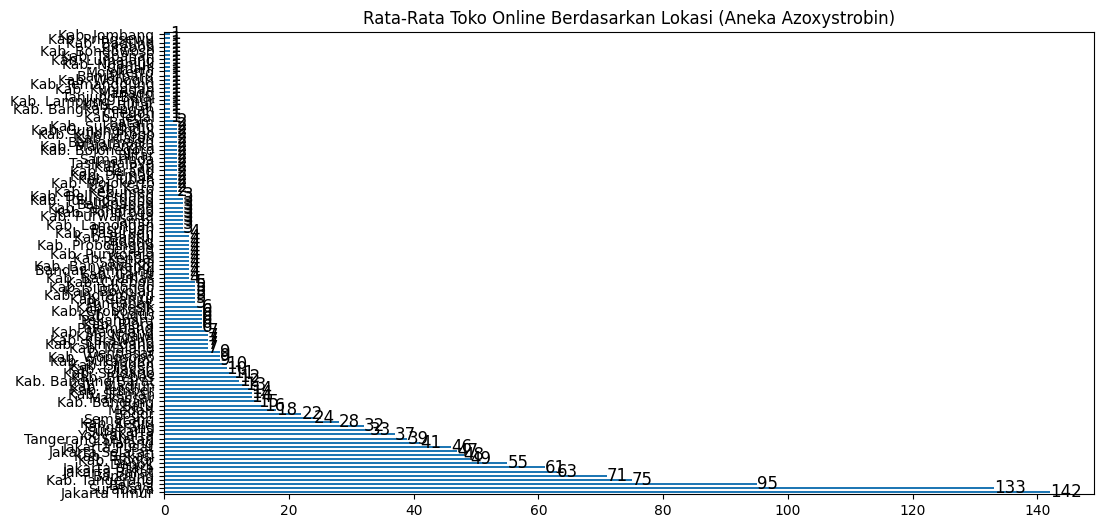

In [19]:
ax = df_Antracol['Lokasi'].value_counts() \
    .plot(kind= 'barh', figsize = (12,6), title='Rata-Rata Toko Online Berdasarkan Lokasi (Aneka Azoxystrobin)')

plt.ticklabel_format(style='plain', axis='x')

ax.bar_label(ax.containers[0], label_type = 'edge', fmt = '%d', fontsize = 12)

plt.show()

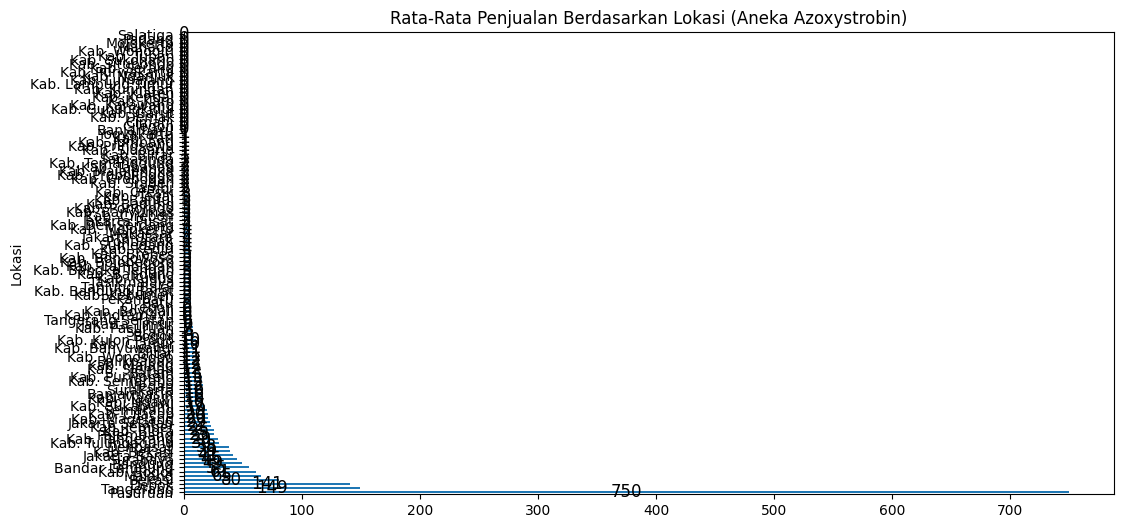

In [20]:
ax = df_Antracol.groupby('Lokasi')['Terjual_num1'].mean().sort_values(ascending=False) \
    .plot(kind= 'barh', figsize = (12,6), title='Rata-Rata Penjualan Berdasarkan Lokasi (Aneka Azoxystrobin)')
ax.bar_label(ax.containers[0], label_type = 'center', fmt = '%d', fontsize=12)
plt.show()

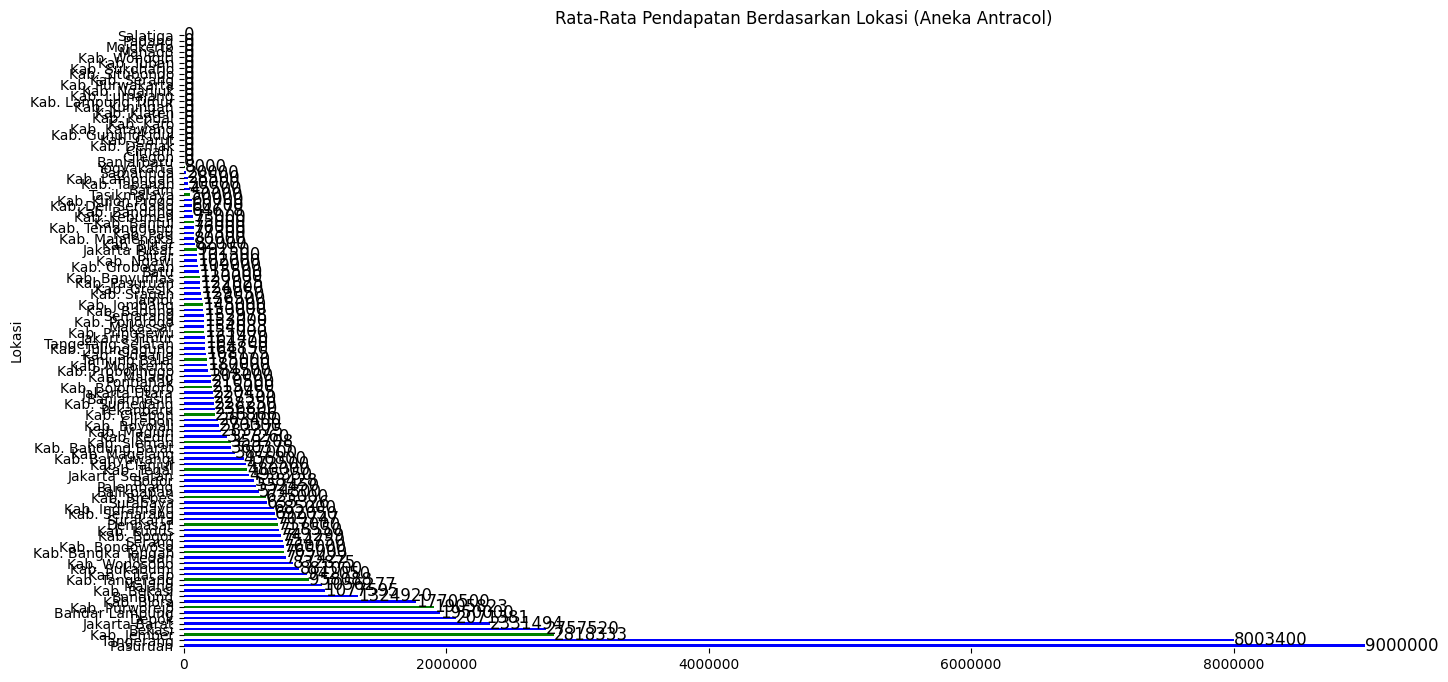

In [21]:
df_Antracol['Pendapatan'] = df_Antracol['Terjual_num1']*df_Antracol['Harga']
my_colors = list('bbgbb')

ax = df_Antracol.groupby('Lokasi')['Pendapatan'].mean().sort_values(ascending=False) \
    .plot(kind= 'barh', figsize = (16,8), title='Rata-Rata Pendapatan Berdasarkan Lokasi (Aneka Antracol)', color=my_colors)
plt.ticklabel_format(style='plain', axis='x')

ax.bar_label(ax.containers[0], label_type = 'edge', fmt = '%d', fontsize=12)
for spine in ax.spines:
    ax.spines[spine].set_visible(False)

#rects = ax.patches

#labels = [f"label{i}" for i in range(len(rects))]


#for rect, label in zip(rects, labels):
#    height = rect.get_height()
#    ax.text(
#        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
#    )

plt.show()

C:\Users\i_fes\AppData\Local\Temp\ipykernel_4068\9955730.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df_Antracol.dropna().corr()


<Axes: >

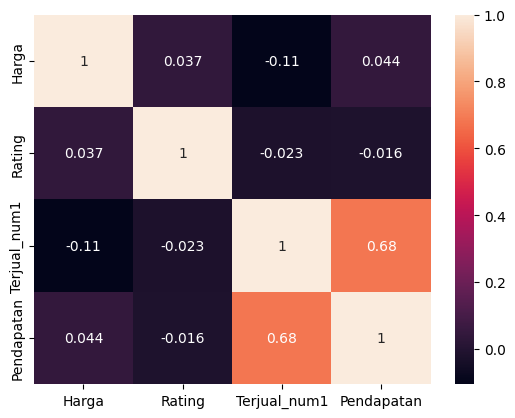

In [22]:
df_corr = df_Antracol.dropna().corr()
sns.heatmap(df_corr, annot = True)

In [ ]:
#df_Antracol.to_excel('Tokped_Daging_API.xlsx', index=False)